# Hello Everyone!!
# Myself Amrita Goon ...
# I am IOT and Computer vision Intern at "The Sparks Foundation"...
# GRIP January 2022
# Today I'm going to present my first task ...
# TASK 1 : OBJECT DETECTION (implement an object detector which identifies the classes of the object of an image or video)
# For this project I've used "Jupyter"

In [16]:
import cv2 # pip install opencv.python

In [17]:
import matplotlib.pyplot as plt # pip install matplotlib

In [18]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [19]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [20]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [21]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [22]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobolenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001E1D2F907B0>

# Read an image

In [30]:
img = cv2.imread('4.jpg')

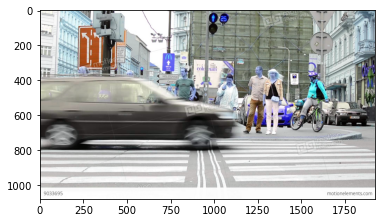

In [31]:
plt.imshow(img) ##bgr

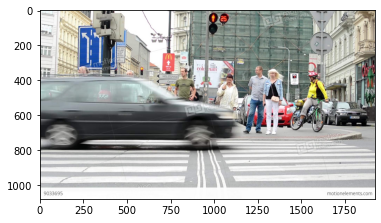

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) ## RGB

In [33]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [34]:
print(ClassIndex)

[ 3 10  1  3  1  1  2 10 10  3  1  1 10  2  1  1  1  3]


In [35]:
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd , conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(flame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_Offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )

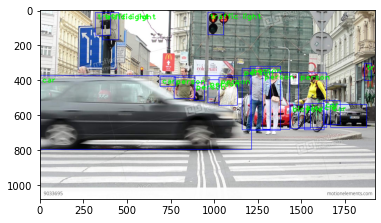

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Thanks